In [1]:
import matplotlib.pyplot as pylot
import pandas as pd
import numpy as np
import pylab as pylab
%matplotlib inline

In [2]:
df=pd.read_csv("data/FuelConsumption.csv")
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [3]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


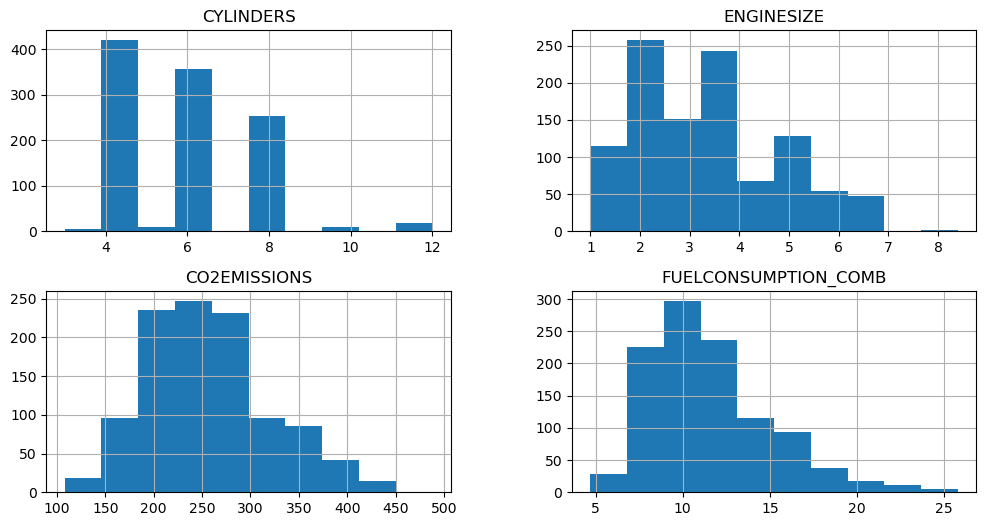

In [4]:
pylot.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
pylot.show()

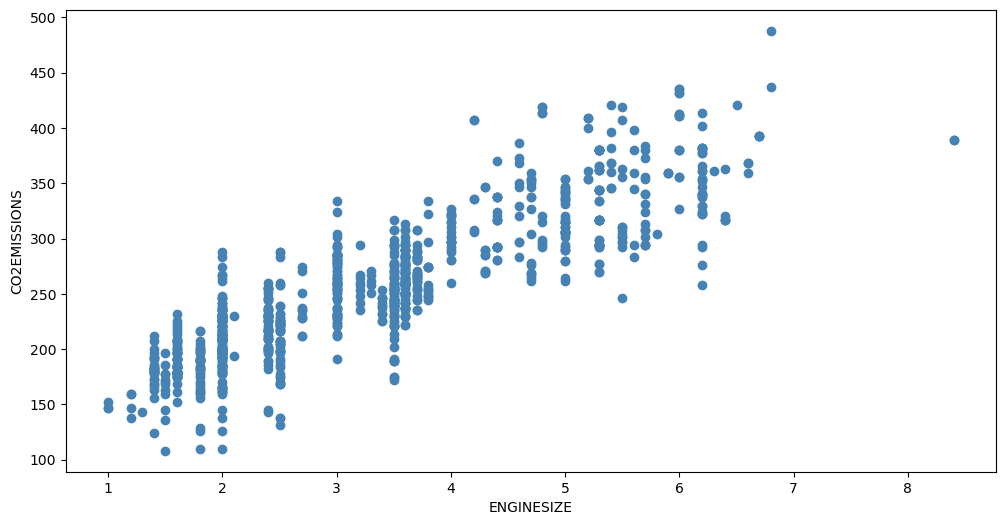

In [5]:
#verinin dağılımına bakmak
pylot.rcParams['figure.figsize'] = (12,6)
pylot.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("CO2EMISSIONS")
pylot.show()

In [6]:
# veri setini ayırma işlemi
from sklearn.model_selection import train_test_split
#test: %20, train:%80
train, test=train_test_split(df, test_size=0.2)

Dependent ve Independent değişkenleri arasındaki ilişki:
['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

CO2EMISSIONS= ß0+ ß1*CYLINDERS + (ß2*ENGINESIZE)² + (ß3*FUELCONSUMPTION_COMB)^3

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

#burada degree'i belirliyoruz ve obje oluşturuyoruz
poly=PolynomialFeatures(degree=2)


In [22]:
train_x_poly=poly.fit_transform(train_x) # poly olarak 2. dereceye dataya dönüştürüyoruz
print(train_x_poly)

[[ 1.    5.3  28.09]
 [ 1.    2.4   5.76]
 [ 1.    6.2  38.44]
 ...
 [ 1.    5.3  28.09]
 [ 1.    5.7  32.49]
 [ 1.    1.6   2.56]]


- Transformed data looks like feature sets of multiple linear regression analysis

y= ß0 + ß1*x1 + ß2*x2

- Polynomial regressionis a special case of liear regression, with selection your features.

In [23]:
clf=linear_model.LinearRegression() #linear reg objesi oluşturuldu
train_y_=clf.fit(train_x_poly, train_y)

# The coefficients  and intercept
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         50.33558927 -1.49047143]]
Intercept:  [107.37991668]


<module 'matplotlib.pyplot' from 'd:\\Program\\Miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

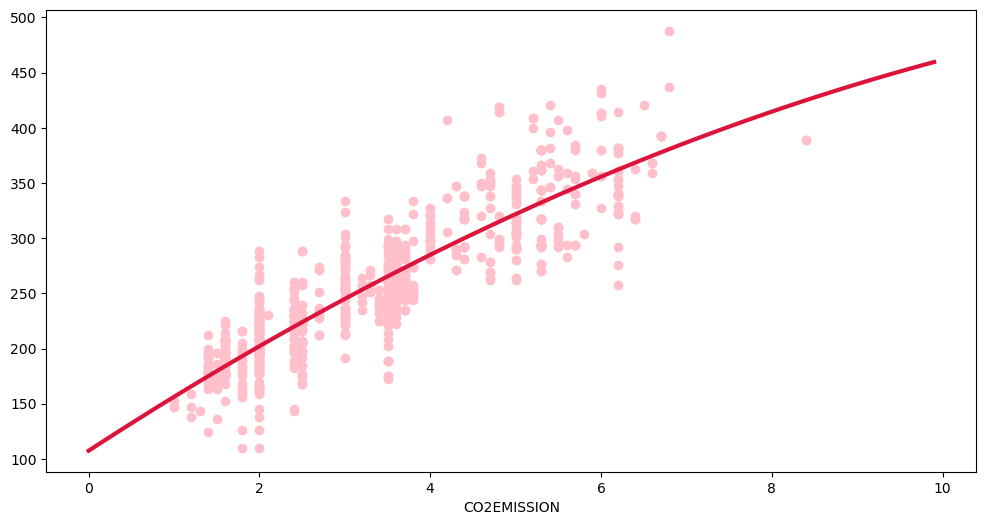

In [24]:
#Formül bulunan değerler üzerinden yazılır.
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="pink")

#ne kadar nokta verirsek o kadar y değerinin karşılığını alırız
xx=np.arange(0.0, 10.0, 0.1)

yy=clf.intercept_[0]+ clf.coef_[0][1]*xx + clf.coef_[0][2]* np.power(xx, 2)

pylot.plot(xx, yy, "crimson", lw=3)

pylot.xlabel("ENGINESIZE")
pylot.xlabel("CO2EMISSION")
pylot

# Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin tahmin ettiği değerler
predicted_y = clf.predict(train_x_poly)

# MAE hesapla
mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MAE: ", mae)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)


MAE:  23.262487646312596
MAE:  23.262487646312596
RMSE:  30.409903170829725
r²:  0.7737351448871732
